Fuente de información:
Este notebook fue elaborado tomando como base un ejercicio de "Data Analysis with Python" de www.coursera.com



El objetivo de este notebook es ilustrar algunos aspectos que son útiles para ejecutar el paso de análisis exploratorio de los datos (Exploratory Data Analysis)

<h2>Tabla de Contenido</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Análisis Exploratorio de Datos</a></li>
    <li><a href="#import_data">Análisis Estadístico Descriptivo</a></li>
    <li><a href="#pattern_visualization">Describir datos categóricos</a></li> 
    <li><a href="#basic_grouping">Agrupar Atributos</a></li>
    <li><a href="#basic_grouping">Analizar patrones de los atributos usando visualización</a></li>
    <li><a href="#correlation_causation">Correlación y Causación</a></li>
    <li><a href="#anova">Análisis de Varianza (ANOVA - Analysis of Variance)</a></li>
</ol>
    

<h3>El análisis exploratorio de datos se utiliza para conocer los datos y sus relaciones, éste tipo de análisis se debe ejecutar antes de utilizar los algoritmos de Machine Learning y esta muy relacionado con la selección de atributos que se usarán en la creación de modelos, esto porque nos sirve para determinar que atributos tienen relación con la variable a predecir</h3>



Iniciemos importando las librerías que vamos a usar en el ejercicio.

In [3]:
### Librería de cálculo numérico
import numpy as np
### Libreria para manipulación de datasets  
import pandas as pd

Ruta donde se encuentra el dataset


In [4]:
### lugar donde se encuentra el dataset
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'


In [5]:
### Cargue de los datos en un dataframe
df = pd.read_csv(path)

In [6]:
### Para observar los primeros registros del dataset
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


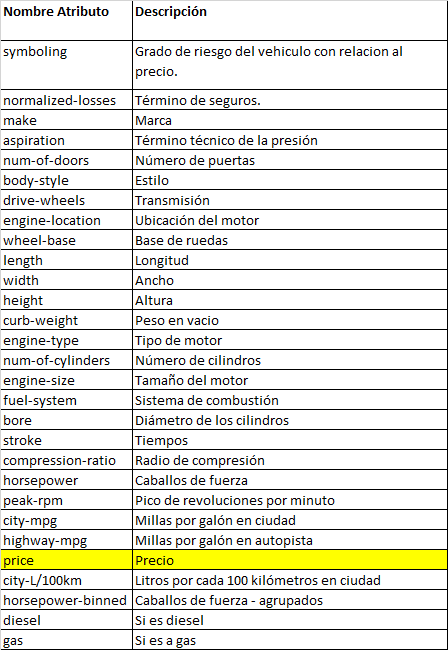

In [7]:
### Conocer los valores unicos de un atributo
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
%%capture
### Instalar seaborn que es un paquete usado para visualización
! pip install seaborn

In [9]:
### Importar matplotlib
import matplotlib.pyplot as plt
### Importar Seaborn
import seaborn as sns
### Para efectuar plot en un notebook
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<p>Cuando se estan visualizando variables, es importante conocer que tipo de dato tiene cada variable, para ello se usa la propiedad dtypes del dataframe.</p>



In [10]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<h2 id="discriptive_statistics">Análisis Descriptivo Estadístico</h2>


<p>La función describe() calcula las estadísticas básicas para todas las variables continuas. Cualquier valor NaN (Not a Number) es saltado automaticamente en esas estadísticas</p>

This will show:
<ul>
    <li>El conteo de la variable. Cuantos valores tiene la variable</li>
    <li>La media</li>
    <li>La desviación estándar (std)</li> 
    <li>El valor mínimo</li>
    <li>El rango intercuartil IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>El valor máximo</li>
<ul>


 La función "describe" se invoca como se muestra a continuación:

In [11]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


<h3>Value Counts. Conteo por cada categoría, Esto aplica para variables categóricas</h3>

In [12]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Podemos convertir la serie anterior en un dataframe :

In [13]:
### Valores que tiene la variable drive-wheels desplegados como un dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


<h2 id="basic_grouping">Agrupamiento (Groupby)</h2>

<p>El método GroupBy agrupa datos por diferentes categorías.</p>

<p>Por ejemplo vamos a agrupar la variable "drive-wheels" y el "price".</p>

In [ ]:
df_group_one = df[['drive-wheels','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>Ahora vamos a agrupar por las variables 'drive-wheels', 'body-style' and 'price'.</p>

In [15]:
df_group_two = df[['drive-wheels','body-style','price']]
df_group_two = df_group_two.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>Estos datos agrupados son más faciles de observar utilizando una tabla privot, como en excel.</p>


In [17]:
grouped_pivot = df_group_two.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

<p>En ocasiones, no tenemos datos para algunas de las celdas, podemos llenar esos valores con ceros, aunque es posible completarlos con otro valor, lo más conveniente es efectuar corrección sobre los datos desde la fuente.</p>

In [ ]:
#fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [ ]:
### Importar la libreria usada para visualización matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

Vamos a usar un mapa de calor para visualizar la relación entre las variables "body-style" y el "price"

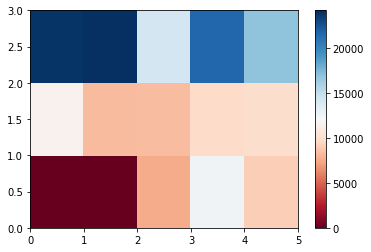

In [ ]:
### Mapa de calor sin etiquetas
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>Mejoremos el etiquetado para observar la información de manera mas util:</p>

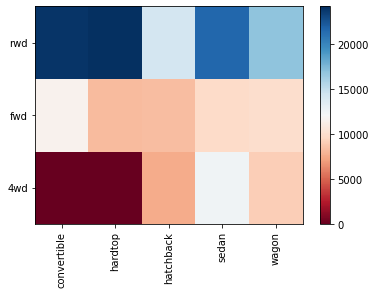

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>La visualización es muy importante en ciencia de datos y los paquetes de Python proporcionan mucha versatilidad.</p>

<p>El análisis exploratorio nos debe ayudar a responder la pregunta: ¿Cuales son las principales características o atributos que tienen mayor impacto sobre la variable objetivo?".</p>

<p>Para responder esta pregunta de manera más precisa, analizamos la correlacion de esas variables con la variable objetivo, con el fin de determinar como la variable objetivo es dependiente del resto de las variables que nos entregaron</p>

<h2 id="correlation_causation">5. Correlación y Causación</h2>

<p><b>Correlación</b>: medida del grado de interdependencia entre variables.</p>

<p><b>Causación</b>: la relación causa y efecto entre dos variables.</p>

<p></p>

<p3>Correlación de Pearson</p>
<p>Mide la dependencia lineal entre dos variables "X" y "Y".</p>
<p>El resultado es el coeficiente de Person, el cual es un valor entre -1 and 1 inclusive, donde:</p>
<ul>
    <li><b>1</b>: Indica correlación lineal positiva.</li>
    <li><b>0</b>: Indica que no hay correlación, es decir, muy probablemente las dos variables no se afectan.</li>
    <li><b>-1</b>: Indica correlación lineal positiva</li>
</ul>

<p>
La correlación de Pearson es el método predeterminado de la función "corr". Como antes, podemos calcular la correlación de Pearson de las variables 'int64' o 'float64'.</p>

In [ ]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


*italicized text* Algunas veces deseamos conocer la significancia de la correlación estimada.

<b>P-value</b>: 
<p>¿Cuál es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que tenemos un 95% de confianza en que la correlación entre las variables es significativa.</p>

By convention, when the
<ul>
    <li>p-value es $<$ 0.001: decimos que hay una evidencia fuerte de que la correlación es significativa.</li>
    <li>the p-value is $<$ 0.05: hay evidencia moderada de que la correlación es significativa.</li>
    <li>the p-value is $<$ 0.1: hay evidencia débil de que la correlación sea sinificativa.</li>
    <li>the p-value is $>$ 0.1: no hay evidencia de que la correlación sea significativa.</li>
</ul>

In [18]:
### Importar paquete stats
from scipy import stats

<h3>Analisis de correlación entre Horsepower y Price</h3>

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("El coeficiente de correlacion de Pearson es ", pearson_coef, " con un p-value de P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.36905742825998e-48


<h5>Conclusion:</h5>

<p>Puesto el p-value is $<$ 0.001, la correlación entre  horsepower y price es estadísticamente significativa, y la relación lineal es muy fuerte (~0.809, close to 1)</p>

FIN